# Homework 3

In this homework you will practice creating "feature vectors" to describe complex data types, and use clustering 
and classification to assess the quality of different features. The homework assumes that all four files of the `mnist` datset available [here](http://yann.lecun.com/exdb/mnist/) have been saved in a folder called `mnist` within the same directory as the notebook.

First we will import some tools/data to use:

In [13]:
%matplotlib inline
import time
import numpy as np
from scipy.signal import convolve2d
import matplotlib.image as mpimg
import pylab as plt
from mnist import MNIST
    
mndata = MNIST('./mnist')

images, labels = mndata.load_training() 

print(len(images[10]))
print(np.array(images).shape)

print(np.array(labels))
#print(labels)

784
(60000, 784)
[5 0 4 ..., 5 6 8]


## Extracting "intuitive" features for MNIST (15 points)

In the lecture we showed that the mean and standard deviation are not good at distinguishing between different hand-written digits. In this problem you will extract "intuitive" features such as vertical lines and see if they improve the situation.

The code below uses [convolutions](https://en.wikipedia.org/wiki/Kernel_%28image_processing%29) to detect features based on a "kernel". Don't worry if you don't understand exactly how this works - you just need to know that the code counts the number of occurences of the `input_pattern` variable.

92


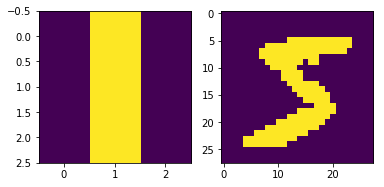

In [14]:
feature = np.array(np.zeros((3,3)))
feature[:,1] = 1
#feature[0,0] = 1
#print(feature)
fig, axes = plt.subplots(1,2)
#print(feature)
axes[0].imshow(feature)


# Hint: you may want to create a function to automatically resize/segment
def create_img(mnist_img, segment_cutoff):
    img = np.array(images[mnist_img]).reshape(28,28)  # here img is not standarized
    #print(img)
    img = img > segment_cutoff
    #img = img.astype('float')
    return img


img = create_img(0,0.75)
#print(img.max())
#print(images[0])
axes[1].imshow(img)

def count_pattern(input_pattern, img):
    "Count the number of times input_pattern occurs in img."
    "Function assumes that img is segmented and contains only 0 and 1"
    filtered = convolve2d(input_pattern, img) #<- create convolved image # 30*30 shape
    #print(filtered[6])
    fsize = input_pattern.sum() #<- if the pattern matches all pixels will be included  # sumation of the number inside
    #print(fsize)  # fsize = 3
    hits = filtered == fsize #<- only take pixels where there is a match  # true or false, numpy.ndarray
    #print(hits)
    n_hits = hits.sum() #<- sum the total hits  # sum all the true number
    return n_hits

#N = count_pattern(feature, img)

N = count_pattern(feature, img)
print(N)  # there are 92 instances of a 3-pixel vertical line in this image.   

Use the function provided to create a feature vector that counts the number of 6-pixel vertical lines and the number of 6-pixel horizontal lines in an image. Use the example code from the lecture to plot the data as a function of these two features for the first 1000 images. Different numbers should have different colors, and the color of 1 should be easily distinguishable.

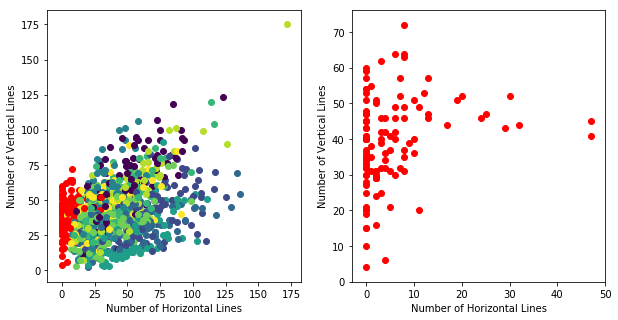

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def create_img(mnist_img, segment_cutoff):
    img = np.array(images[mnist_img]).reshape(28,28)  # here img is not standarized
    img = img > segment_cutoff
    return img

featurever = np.array(np.zeros((6,6)))
featurever[:,1] = 1
featurehor = np.array(np.zeros((6,6)))
featurehor[:,1] = 1
features = [featurehor.T,featurever]   # X IS horiz
#print(features)

def summarize(img,features):
    fvec = []
    for fi in features:      
        ni = count_pattern(fi, img)
        fvec.append(ni)
    return fvec

fig,axes = plt.subplots(1,2, figsize = (10,5))
colors = [cm.viridis((i/9)) for i in range(10)] #<- this gives us a list of RGB colors

N_images = 1000
for i,img in enumerate(images[:N_images]):  
    label = labels[i]
    fvec = summarize(create_img(i,0.75),features)
    #print(fvec)
    c = colors[label]
    if label == 1:
        c = 'r'    
        axes[1].scatter(fvec[0],fvec[1],color=c,marker='o')
    axes[0].scatter(fvec[0],fvec[1],color=c,marker='o')
    
axes[0].set_xlabel('Number of Horizontal Lines')
axes[0].set_ylabel('Number of Vertical Lines')   
axes[1].set_xlabel('Number of Horizontal Lines')
axes[1].set_ylabel('Number of Vertical Lines')  

#    """

## Simple classification using lines (5 points)

Intuitively we would expect "1" to have lots of vertical lines, but very few horizontal lines. Use the plot above to determine reasonable cutoffs for "lots" and "few" to try to distinguish the number 1 from others. Write a function that uses these cutoffs to predict whether an image is a "1" or not.

In [5]:
#? determine cutoffs?
# hor_cutoff = 20
# ver_cutoff = 65

def is_one(n_horizontal, n_vertical): #can be almost anything    
    if n_vertical < 70 and n_horizontal < 30:
        #print('The image is "1".')   
        is_one = True
    else:
        is_one = False    
    return is_one
    
is_one(25, 13)



True

## Assessing the accuracy (10 points)

Write another function that will assess the accuracy of your `is_one` function. This should return four percentages:

* correct correct: percentage of "1" images correctly identified as "1"
* false positive: percentage of images that are identified as "one" even though they are not
* false negative: percentage of images that are not identified as "one" even though they are
* correct incorrect: percentage of images that are correctly identified as "not 1".

Use this function to assess the percent correct (correct correct + correct incorrect) and incorrect (false positive + false negative) for your simple line-based classifier.

You may want to create a new `classification_function` that takes only the input images as an argument.

In [27]:

def test_classifier(images, labels, classification_function):
    images_is_one = []
    images_cc = []
    images_fp = []
    images_fn = []
    images_ci = []
    
    label_one = 0
    
    N_images = 1000       # how many N needed ?? ask ??
    for i,img in enumerate(images[:N_images]):  
        label = labels[i]
        fvec = summarize(create_img(i,0.75),features)
        images_is_one.append(is_one(fvec[0],fvec[1]))
        images_cc.append(is_one(fvec[0],fvec[1]) and label == 1)  # account all the images identified as '1'
        images_fp.append(is_one(fvec[0],fvec[1]) and label != 1)  
        images_fn.append(is_one(fvec[0],fvec[1]) == False and label == 1) 
        images_ci.append(is_one(fvec[0],fvec[1]) == False and label != 1)

        if label == 1:
            label_one = label_one + 1
    
    cc = sum(images_cc) / N_images * 100
    fp = sum(images_fp) / N_images * 100
    fn = sum(images_fn) / N_images * 100
    ci = sum(images_ci) / N_images * 100
    
    return cc,fp, fn,ci
    

cc,fp, fn,ci = test_classifier(images,labels, is_one)
print('The percent correct is {} by line-based classifer'.format(cc+ci))
print('The percent incorrect is {} by line-based classifer'.format(fp+fn))
print(cc+fp+fn+ci)

The percent correct is 72.2 by line-based classifer
The percent incorrect is 27.8 by line-based classifer
100.0


## Extracting "data driven" features from MNIST (10 points)

Use principal component analysis (PCA) to visualize the first 1000 MNIST images in 2D space. Use a similar color scale as above to distinguish between different numbers.

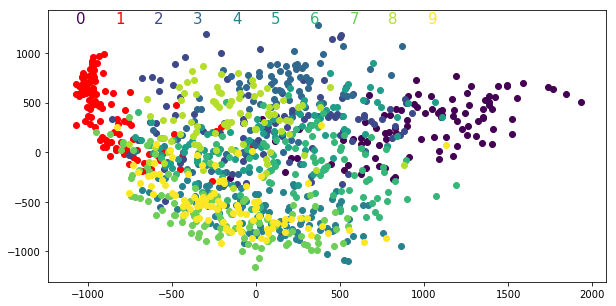

In [18]:
from sklearn.decomposition import PCA
import pandas as pd

images = np.array(images)
images_subset = images[:1000,:] #<- take the first 1000 images
#print(images_subset)
images_subset.shape
mnist_pca = PCA(n_components=100)
PCA_mnist = mnist_pca.fit_transform(images_subset)
#print(PCA_mnist[0,0])
#print(PCA_mnist)

fig, ax = plt.subplots(figsize=(10,5))
pca_df = pd.DataFrame(PCA_mnist)
pca_df['label'] = labels[:1000]

colors = [plt.cm.viridis((i/9)) for i in range(10)]
xpos = 0.05
for label in range(0,10):
    idxs = np.array(pca_df['label'] == label)
    #print(idxs)
    c = colors[label]
    if label == 1:
        c = 'r'  
    ax.scatter(PCA_mnist[idxs,0], PCA_mnist[idxs,1], color=c)
    ax.annotate(str(label), xy=[xpos, 0.95], xycoords='axes fraction', color=c, size=15)
    xpos += 0.07




## Simple classification using PCA (5 points)

Create a function to classify a number as "1" or "not 1" based on the first 2 principal components. Compare the accuracy to the accuracy of the simple horizontal/vertical line classifier from above.

In [32]:
def is_one_pca(pc1,pc2):
    if pc1 < -750 and pc2 < 1000:
        is_one_pca = True
    else:
        is_one_pca = False
    return is_one_pca

def test_classifier(images, labels, classification_function):
    images_is_one = []
    images_cc = []
    images_fp = []
    images_fn = []
    images_ci = []
    
    label_one = 0
    
    N_images = 1000       # how many N needed ?? ask ??
    for i,img in enumerate(images[:N_images]):  
        label = labels[i]
        images_is_one.append(is_one_pca(PCA_mnist[i,0],PCA_mnist[i,1]))
        images_cc.append(is_one_pca(PCA_mnist[i,0],PCA_mnist[i,1]) and label == 1)  # account all the images identified as '1'
        images_fp.append(is_one_pca(PCA_mnist[i,0],PCA_mnist[i,1]) and label != 1)  
        images_fn.append(is_one_pca(PCA_mnist[i,0],PCA_mnist[i,1]) == False and label == 1) 
        images_ci.append(is_one_pca(PCA_mnist[i,0],PCA_mnist[i,1]) == False and label != 1)

        if label == 1:
            label_one = label_one + 1
    
    cc = sum(images_cc) / N_images * 100
    fp = sum(images_fp) / N_images * 100
    fn = sum(images_fn) / N_images * 100
    ci = sum(images_ci) / N_images * 100
    
    return cc+ci, fp+fn

ccci, fpfn = test_classifier(images, labels, is_one_pca)    # AJ answer is 94.6 and 5.4
print('The percent correct is {0: .2f} by using PCA'.format(ccci))
print('The percent incorrect is {0: .2f} by using PCA'.format(fpfn))

print('The percent correct is 72.2 by line-based classifer \nThe percent incorrect is 27.8 by line-based classifer')
print('PCA classifer is more accurate than line-based classifer')

The percent correct is  96.40 by using PCA
The percent incorrect is  3.60 by using PCA
The percent correct is 72.2 by line-based classifer 
The percent incorrect is 27.8 by line-based classifer
PCA classifer is more accurate than line-based classifer


# Visualizing principal components (10 points)

Use the first 250 principal components to reconstruct an approximation of image number 85. See Hastie Equation 14.55 for a hint.

(784,)


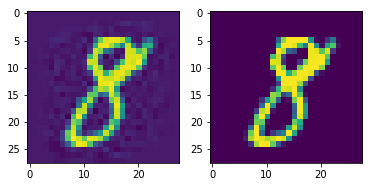

In [33]:
import sklearn.datasets, sklearn.decomposition

fig, axes = plt.subplots(1,2)
N = 85

original = images[N].reshape(28,28)
axes[1].imshow(original)

images = np.array(images)
images_subset = images[:1000,:] #<- take the first 1000 images
mnist_pca = PCA(n_components=250)
PCA_mnist = mnist_pca.fit_transform(images_subset)
#print(PCA_mnist.shape)   # (1000, 250)
#print(mnist_pca.components_.shape)  # (250, 784)


"""

filtered = mnist_pca.inverse_transform(PCA_mnist)
print(filtered.shape)
axes[0].imshow(filtered[85].reshape(28,28))

"""

xhat = np.dot(PCA_mnist[85,:],mnist_pca.components_) #784 = 1*250 * (250*784)
print(xhat.shape)
mean = mnist_pca.mean_
xhat = xhat + mean
axes[0].imshow(xhat.reshape(28,28))






## k-means clustering (15 points)

Use the `scikit-learn` implementation of the k-means clustering algorithm to identify the best 10 clusters using the first 2 princpal components. Plot the points with color codes corresponding to their assigned clusters, and calculate the accuracy of the "1" cluster.

The correct percent is  94.50 and incorrect percent is  5.50 by kmeans


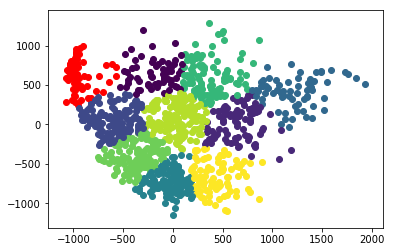

In [39]:
from sklearn.cluster import KMeans

images = np.array(images)
images_subset = images[:1000,:] #<- take the first 1000 images
mnist_pca = PCA(n_components=2)
PCA_mnist = mnist_pca.fit_transform(images_subset)
pca_df = pd.DataFrame(PCA_mnist)
pca_df['label'] = labels[:1000]
kmeans = KMeans(n_clusters=10)
kmeans.fit(PCA_mnist)
y_kmeans = kmeans.predict(PCA_mnist)

def is_one_k_means(num,group_1):
    if num == group_1:
        is_one_k_means = True
    else:
        is_one_k_means = False
    return is_one_k_means

def match_k_means_group(labels,kmgroups): #this function takes in the labels list and the output of kmeans
    frac = []                             #and returns the k means group with the largest percentage of ones
    for j in range(10):
        km_TF = kmgroups == j
        lbl = np.array(labels) == 1
        lbl_num = np.zeros(len(km_TF))
        for k,_ in enumerate(km_TF):
            if km_TF[k] and lbl[k]:
                lbl_num[k] = True
            else:
                lbl_num[k] = False
        if len([a for a in km_TF if a==True]) ==0:
            frac.append(0)
        else:
            frac.append(len([a for a in lbl_num if a==True])/len([a for a in km_TF if a==True]))
    k_means_group = list(frac).index(max(frac))
    return k_means_group


#"""  

def test_classifier(images, labels, classification_function,y_kmeans):   
    images_is_one = []
    images_cc = []
    images_fp = []
    images_fn = []
    images_ci = []
    k_means_group = match_k_means_group(labels,y_kmeans)
    
    label_one = 0   
    N_images = 1000       
    for i,img in enumerate(images[:N_images]):  
        label = labels[i]
        images_is_one.append(is_one_k_means(y_kmeans[i],k_means_group))
        images_cc.append(is_one_k_means(y_kmeans[i],k_means_group) and label == 1)  # account all the images identified as '1'
        images_fp.append(is_one_k_means(y_kmeans[i],k_means_group) and label != 1)  
        images_fn.append(is_one_k_means(y_kmeans[i],k_means_group) == False and label == 1) 
        images_ci.append(is_one_k_means(y_kmeans[i],k_means_group) == False and label != 1)

        if label == 1:
            label_one = label_one + 1
    
    cc = sum(images_cc) / N_images * 100
    fp = sum(images_fp) / N_images * 100
    fn = sum(images_fn) / N_images * 100
    ci = sum(images_ci) / N_images * 100
    
    return cc+ci, fp+fn

c,f=test_classifier(images_subset,labels[:1000],is_one_k_means,y_kmeans)

print('The correct percent is {0: .2f} and incorrect percent is {1: .2f} by kmeans'.format(c,f))

k_means_group = match_k_means_group(labels[:1000],y_kmeans)
#print(k_means_group)
colors = [plt.cm.viridis((i/9)) for i in range(10)]


for i in range(0,1000):
    label = y_kmeans[i]
    #c = colors[label]
    if label == k_means_group:
        c = 'r'  
    else:
        c = colors[label]
    plt.scatter(PCA_mnist[i,0], PCA_mnist[i,1], color=c)


#plt.scatter(PCA_mnist[:,0], PCA_mnist[:,1] , c = y_kmeans, cmap='viridis') #<- predicted

#"""

## Analyzing the PCA results (10 points)

Create a "scree plot" for the PCA analysis to show the amount of variance captured as a function of the number of principal components. Determine how many principal components are needed to capture 95% of the variance.

(784,)
You need 153 components to capture 95.0196019261303% variance in 60000 images


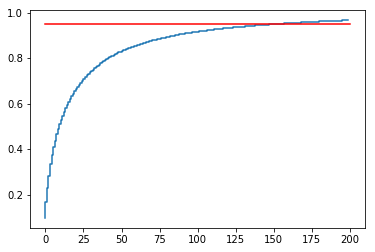

In [42]:

fig, ax = plt.subplots()

n_components = 784

mnist_pca = PCA(n_components)
images = np.array(images)
mnist_pca.fit(images)

#print(mnist_pca.explained_variance_ratio_.shape)

ratio = 0
for i in range(n_components):
    ratio = ratio + mnist_pca.explained_variance_ratio_[i]
    if ratio < 0.95:
        continue
    else:
        print('You need {0} components to capture {1}% variance in 60000 images'.format(i, ratio*100))
        break
        

ax.step(range(200), np.cumsum(mnist_pca.explained_variance_ratio_[:200]))

ax.plot([0,200],[0.95,0.95],'-r')



## Linear discriminant analysis (15 points) (Graduate only)

Use linear discriminant analysis (LDA) with 2 components to perform dimensional reduction and plot the reduced dimensional space with each point labeled by class.

/Users/wenqinyou/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


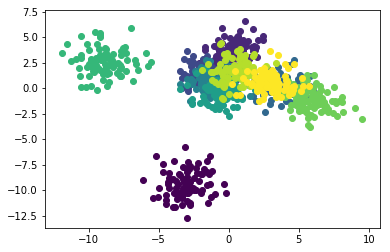

In [43]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# LDA

sklearn_lda = LDA(n_components=2)


LDA_mnist = sklearn_lda.fit_transform(images_subset,labels[:1000])
lda_df = pd.DataFrame(LDA_mnist)
lda_df['label'] = labels[:1000]

fig, ax = plt.subplots()

colors = [plt.cm.viridis((i/9)) for i in range(10)]
for label in range(0,10):
    idxs = np.array(lda_df['label'] == label)
    #print(idxs)
    c = colors[label] 
    ax.scatter(LDA_mnist[idxs,0], LDA_mnist[idxs,1], color=c)
